In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [28]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic+gamma+telescope/magic04.data' ,names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [29]:
df['class'] = (df['class'] == "g").astype(int)

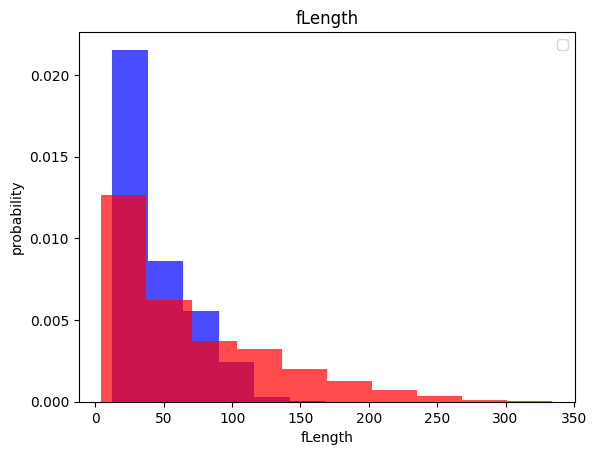

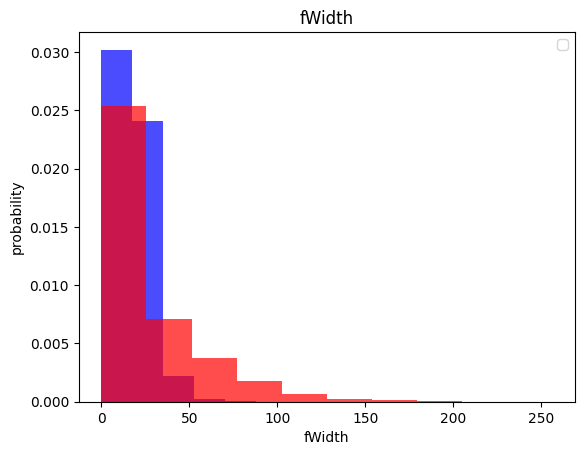

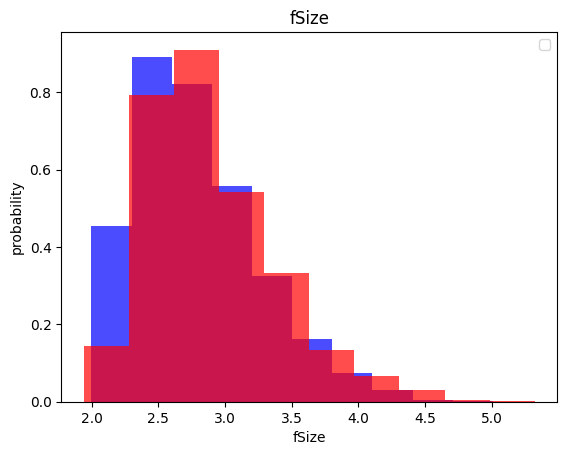

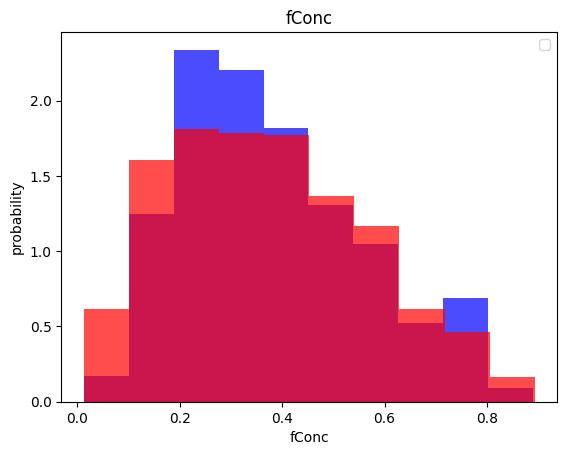

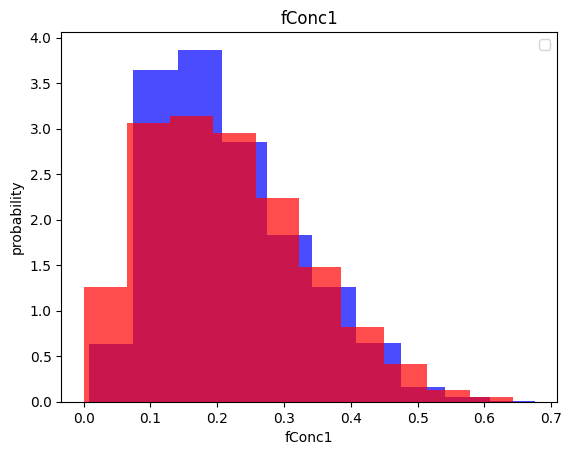

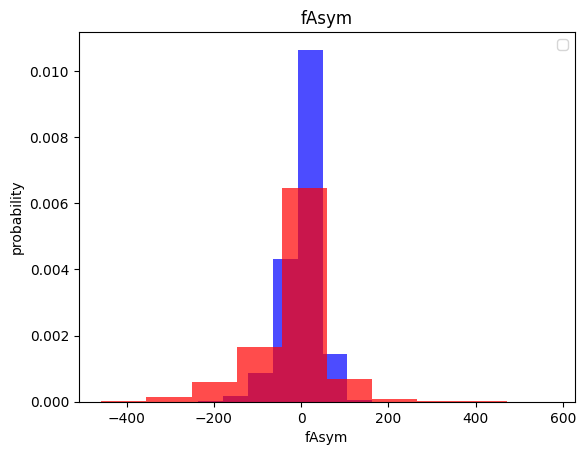

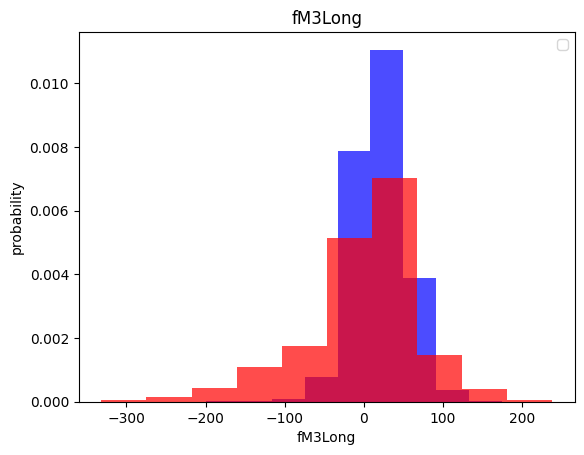

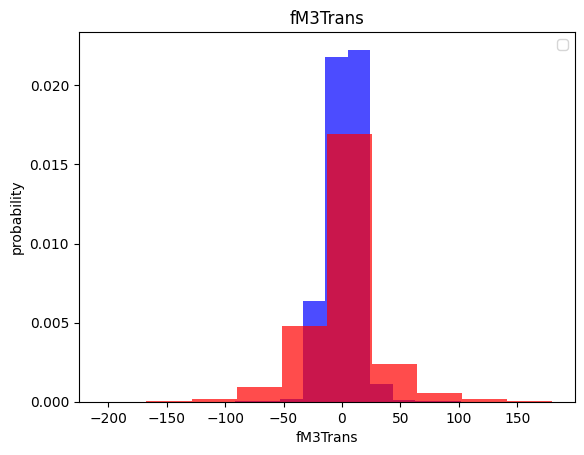

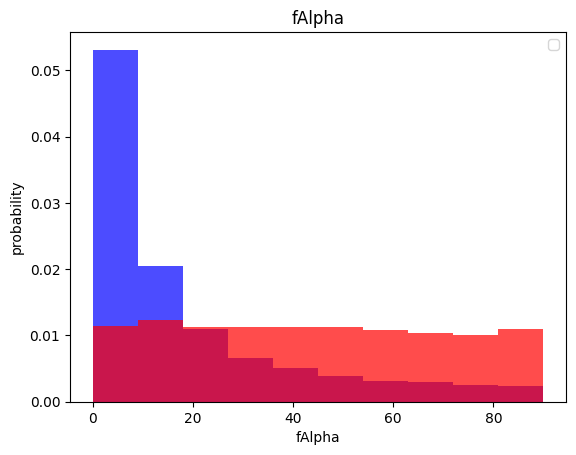

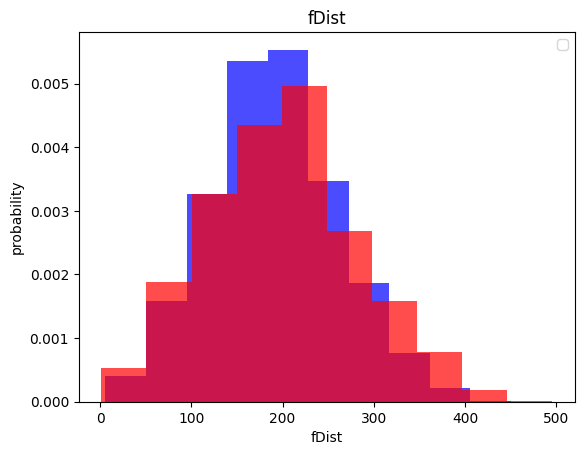

In [30]:
for label in cols[:-1]:
    plt.hist(df[df['class'] ==1][label],color='blue',label='gamma' , alpha=0.7 , density=True)
    plt.hist(df[df['class'] ==0][label],color='red',label='hadron' , alpha=0.7 , density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend('')
    plt.show()

# Train, validation and test datasets

In [31]:
train , valid , test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [32]:
print(len(train[train['class'] ==1 ])) # gamma
print(len(train[train['class'] ==0 ])) # hadron

7319
4093


In [33]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # increase the size of the dataset of the small class
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X,np.reshape(y, (-1,1))))

    return data, X, y

In [34]:
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid,oversample=False)
test, X_test,y_test = scale_dataset(test,oversample=False)


# kNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
y_pred = knn_model.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1319
           1       0.84      0.87      0.85      2485

    accuracy                           0.81      3804
   macro avg       0.79      0.78      0.78      3804
weighted avg       0.80      0.81      0.80      3804



# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [41]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1319
           1       0.74      0.88      0.80      2485

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.70      3804



# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [44]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1319
           1       0.84      0.81      0.83      2485

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# Support Vector Machines

In [45]:
from sklearn.svm import SVC

In [46]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [47]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1319
           1       0.89      0.88      0.88      2485

    accuracy                           0.85      3804
   macro avg       0.83      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



# Neural Net

In [48]:
import tensorflow as tf

In [49]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu' , input_shape=(10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history = nn_model.fit(
    X_train,y_train,epochs=100 , batch_size=32 , validation_split=0.2 , verbose=0
)
# verbose = 0 => don't show the execution process

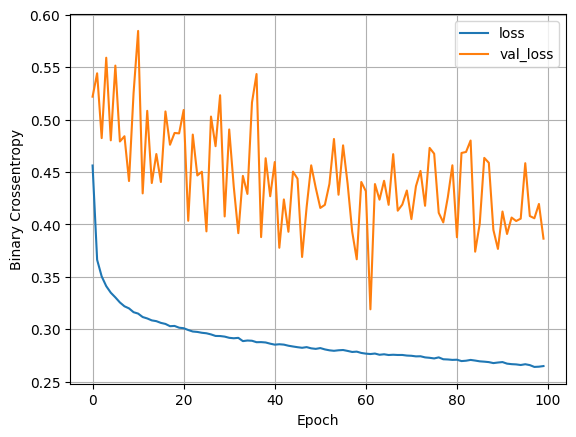

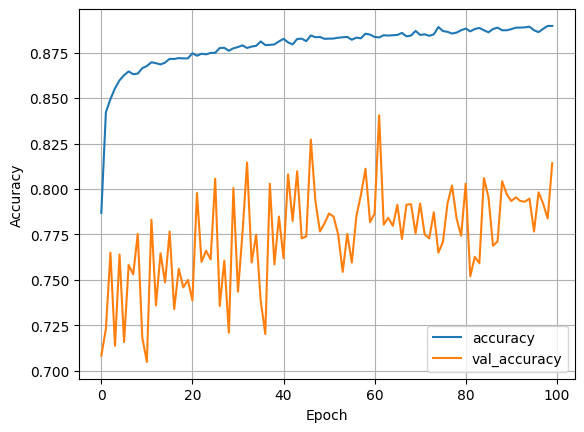

In [52]:
plot_loss(history)
plot_accuracy(history)